In [1]:
import __init__
import vsrl_utils as vu
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

added coco/PythonAPI to pythonpath


In [2]:
def draw_bbox(plt, ax, rois, fill=False, linewidth=2, edgecolor=[1.0, 0.0, 0.0], **kwargs):
    for i in range(rois.shape[0]):
        roi = rois[i,:].astype(np.int)
        ax.add_patch(plt.Rectangle((roi[0], roi[1]),
            roi[2] - roi[0], roi[3] - roi[1],
            fill=False, linewidth=linewidth, edgecolor=edgecolor, **kwargs))

def subplot(plt, (Y, X), (sz_y, sz_x) = (10, 10)):
    plt.rcParams['figure.figsize'] = (X*sz_x, Y*sz_y)
    fig, axes = plt.subplots(Y, X)
    return fig, axes

In [3]:
# Load COCO annotations for V-COCO images
coco = vu.load_coco()

# Load the VCOCO annotations for vcoco_train image set
vcoco_all = vu.load_vcoco('vcoco_train')
for x in vcoco_all:
    x = vu.attach_gt_boxes(x, coco)

loading annotations into memory...
Done (t=2.39s)
creating index...
index created!


In [4]:
# Action classes and roles in V-COCO
classes = [x['action_name'] for x in vcoco_all]
for i, x in enumerate(vcoco_all):
    print '{:>20s}'.format(x['action_name']), x['role_name']

                hold ['agent', 'obj']
               stand ['agent']
                 sit ['agent', 'instr']
                ride ['agent', 'instr']
                walk ['agent']
                look ['agent', 'obj']
                 hit ['agent', 'instr', 'obj']
                 eat ['agent', 'instr', 'obj']
                jump ['agent', 'instr']
                 lay ['agent', 'instr']
       talk_on_phone ['agent', 'instr']
               carry ['agent', 'obj']
               throw ['agent', 'obj']
               catch ['agent', 'obj']
                 cut ['agent', 'instr', 'obj']
                 run ['agent']
    work_on_computer ['agent', 'instr']
                 ski ['agent', 'instr']
                surf ['agent', 'instr']
          skateboard ['agent', 'instr']
               smile ['agent']
               drink ['agent', 'instr']
                kick ['agent', 'obj']
               point ['agent', 'instr']
                read ['agent', 'obj']
           snowboard ['agent'

In [5]:
# Visualize annotations for the some class
cls_id = classes.index('hit')
vcoco = vcoco_all[cls_id]

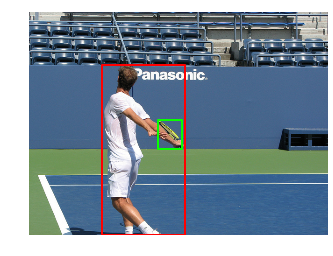

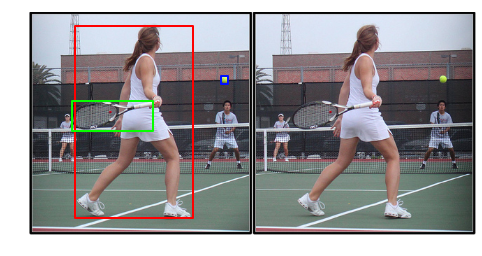

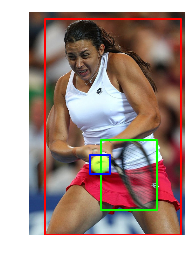

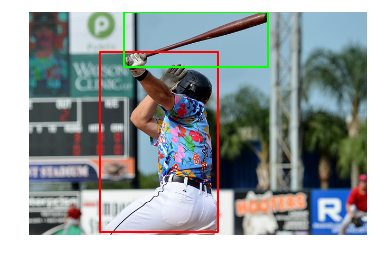

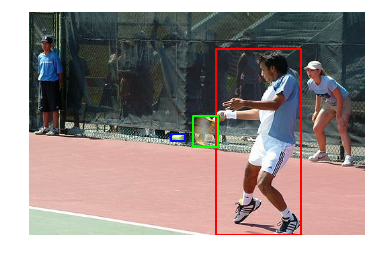

In [6]:
np.random.seed(1)
positive_index = np.where(vcoco['label'] == 1)[0]
positive_index = np.random.permutation(positive_index)

# the demo here laods images from the COCO website, 
# you can alternatively use your own local folder of COCO images.
load_coco_image_from_web = True
if load_coco_image_from_web:
    base_coco_url = 'http://mscoco.org/images/'
    from PIL import Image
    import urllib, cStringIO

cc = plt.get_cmap('hsv', lut=4)

for i in range(5):
    id = positive_index[i]

    # load image
    coco_image = coco.loadImgs(ids=[vcoco['image_id'][id][0]])[0]
    if load_coco_image_from_web:
        coco_url = base_coco_url + str(coco_image['id'])
        file = cStringIO.StringIO(urllib.urlopen(coco_url).read())
        im = np.asarray(Image.open(file))
        
    sy = 4.; sx = float(im.shape[1])/float(im.shape[0])*sy;
    fig, ax = subplot(plt, (1,1), (sy,sx)); ax.set_axis_off(); 
    ax.imshow(im);
    
    # draw bounding box for agent
    draw_bbox(plt, ax, vcoco['bbox'][[id],:], edgecolor=cc(0)[:3])
    role_bbox = vcoco['role_bbox'][id,:]*1.
    role_bbox = role_bbox.reshape((-1,4))
    for j in range(1, len(vcoco['role_name'])):
        if not np.isnan(role_bbox[j,0]):
            draw_bbox(plt, ax, role_bbox[[j],:], edgecolor=cc(j)[:3])